Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Import CSV Files
station_POI = pd.read_csv('/Users/mitchellpalmer/Projects/Lighthouse Lab Projects/Data_Statistical_Modeling/Statistical_Modeling_Project/Statistical-Modelling-Project./data/FOURSQUARE_Lisbon_Station_Surroundings.csv')

lb_citybikes = pd.read_csv('/Users/mitchellpalmer/Projects/Lighthouse Lab Projects/Data_Statistical_Modeling/Statistical_Modeling_Project/Statistical-Modelling-Project./data/lisbon_bike_station_df.csv')

In [97]:
# View descriptive statistics of Citybike Stations
lb_citybikes.head()

,latitude,longitude,timestamp,free bikes,empty slots,total slots,station_id
0,38.753590,-9.157170,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0
1,38.752310,-9.158850,2025-07-26T23:39:44.571444+00:00Z,0,23,23,1
2,38.770657,-9.160248,2025-07-26T23:39:44.570809+00:00Z,7,26,33,2
3,38.780690,-9.096220,2025-07-26T23:39:44.570706+00:00Z,8,6,14,3
4,38.702936,-9.175234,2025-07-26T23:39:44.571010+00:00Z,6,17,23,4


In [74]:
lb_citybikes.head()

,latitude,longitude,timestamp,free bikes,empty slots,total slots,station_id
0,38.753590,-9.157170,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0
1,38.752310,-9.158850,2025-07-26T23:39:44.571444+00:00Z,0,23,23,1
2,38.770657,-9.160248,2025-07-26T23:39:44.570809+00:00Z,7,26,33,2
3,38.780690,-9.096220,2025-07-26T23:39:44.570706+00:00Z,8,6,14,3
4,38.702936,-9.175234,2025-07-26T23:39:44.571010+00:00Z,6,17,23,4


In [ ]:
# View descriptive statistics of Points_Of_Interest 
station_POI.describe()

,rating,popularity,distance,veracity,station_id
count,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000
mean,0.831546,0.831546,419.132685,4.082178,96.477127
std,0.240817,0.240817,209.879028,0.913773,56.214922
min,0.000820,0.000820,7.000000,1.000000,0.000000
25%,0.864772,0.864772,263.250000,4.000000,48.000000
50%,0.933665,0.933665,400.000000,4.000000,96.000000
75%,0.971772,0.971772,557.000000,5.000000,145.000000
max,1.000000,1.000000,999.000000,5.000000,194.000000


In [ ]:
# Merge DataFrame by BikeStation_ID
bikestations_POI = pd.merge(lb_citybikes,station_POI,on='station_id',how='inner')

bikestations_POI.head()

,latitude,longitude,timestamp,free bikes,empty slots,total slots,station_id,name,rating,total num ratings,popularity,distance,veracity,category
0,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Torre Do Tombo,0.944024,21,0.944024,124,4,"Government Building, Library"
1,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Aula Magna,0.987013,127,0.987013,138,4,Concert Hall
2,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Alameda da Universidade,0.938399,47,0.938399,121,4,"Plaza, Garden"
3,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Letras Bar,0.781422,11,0.781422,87,3,Portuguese Restaurant
4,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Horto do Campo Grande,0.959710,40,0.959710,337,5,Flower Store


In [ ]:
# Observe data types and begin cleaning where necessary
bikestations_POI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9662 entries, 0 to 9661
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           9662 non-null   float64
 1   longitude          9662 non-null   float64
 2   timestamp          9662 non-null   object 
 3   free bikes         9662 non-null   int64  
 4   empty slots        9662 non-null   int64  
 5   total slots        9662 non-null   int64  
 6   station_id         9662 non-null   int64  
 7   name               9662 non-null   object 
 8   rating             9662 non-null   float64
 9   total num ratings  9662 non-null   object 
 10  popularity         9662 non-null   float64
 11  distance           9662 non-null   int64  
 12  veracity           9662 non-null   int64  
 13  category           9644 non-null   object 
dtypes: float64(4), int64(6), object(4)
memory usage: 1.0+ MB


In [ ]:
# Total Number Of Ratings has object '{}' values
print(bikestations_POI['total num ratings'].dtype)
print(bikestations_POI['total num ratings'].head(10))

object
0     21
1    127
2     47
3     11
4     40
5    351
6    199
7     {}
8     10
9     63
Name: total num ratings, dtype: object


In [ ]:
# Clean Total Number Of Ratings column into Numeric Dtype
bikestations_POI['total num ratings'] = pd.to_numeric(
    bikestations_POI['total num ratings']
        .astype(str)
        .str.replace(r'[{}]', '', regex=True)
        .str.strip(), 
    errors='coerce'    
)

In [57]:
bikestations_POI.value_counts('category').head(5)

category
Portuguese Restaurant    946
Restaurant               578
Café                     494
Bakery                   305
Coffee Shop              173
Name: count, dtype: int64

In [66]:
# Recreate category filters for top 5 category types + bar

# Filter masks for categories values
restaurant_mask = bikestations_POI['category'].str.contains('Restaurant', case=False, na=False)
bar_mask = bikestations_POI['category'].str.contains('Bar', case=False, na=False)
cafe_mask = bikestations_POI['category'].str.contains('Café', case=False, na=False)
bakery_mask = bikestations_POI['category'].str.contains('Bakery', case=False, na=False)
coffee_mask = bikestations_POI['category'].str.contains('Coffee', case=False, na=False)

# Create Series for each mask-filter
restaurant_counts = bikestations_POI[restaurant_mask].groupby('station_id').size().rename('restaurant_count')
bar_counts = bikestations_POI[bar_mask].groupby('station_id').size().rename('bar_count')
cafe_counts = bikestations_POI[cafe_mask].groupby('station_id').size().rename('cafe_counts')
bakery_counts = bikestations_POI[bakery_mask].groupby('station_id').size().rename('bakery_counts')
coffee_counts = bikestations_POI[coffee_mask].groupby('station_id').size().rename('coffee_counts')


# Concatenate Series into Dataframe 
categories_counts = pd.concat([restaurant_counts, bar_counts,cafe_counts,bakery_counts,coffee_counts], axis=1).fillna(0).astype(int)
categories_counts.reset_index(inplace=True)

# Observe category values for each bike_station
categories_counts

,station_id,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,18,1,8,2,2
1,1,18,1,6,0,2
2,2,18,0,4,4,1
3,3,12,1,4,2,3
4,4,21,3,4,2,1
...,...,...,...,...,...,...
190,190,17,4,3,3,1
191,191,13,0,1,1,2
192,192,24,3,3,2,1
193,193,20,11,2,1,2


In [67]:
# Create new Dataframe observing ratings of locations nearby each bike_station
EDA_bikestations = bikestations_POI.groupby(['station_id', 'total slots']).agg({
    'rating': 'mean',
    'total num ratings': 'sum'
}).reset_index()




In [68]:
# Concatenate Ratings_DF and Categories_DF for further analysis
EDA_bikestations = pd.merge(EDA_bikestations, categories_counts,on='station_id',how='inner')

EDA_bikestations.rename(columns={
    'total slots':'total bike slots',
    'rating':'average rating',
    'total num ratings':'total ratings'
    },
    inplace=True)

EDA_bikestations

,station_id,total bike slots,average rating,total ratings,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,32,0.857668,2772.0,18,1,8,2,2
1,1,23,0.780331,1808.0,18,1,6,0,2
2,2,33,0.804175,1134.0,18,0,4,4,1
3,3,14,0.798679,1669.0,12,1,4,2,3
4,4,23,0.803990,6061.0,21,3,4,2,1
...,...,...,...,...,...,...,...,...,...
190,190,30,0.869974,7211.0,17,4,3,3,1
191,191,41,0.739951,774.0,13,0,1,1,2
192,192,17,0.754461,3428.0,24,3,3,2,1
193,193,20,0.948785,14309.0,20,11,2,1,2


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

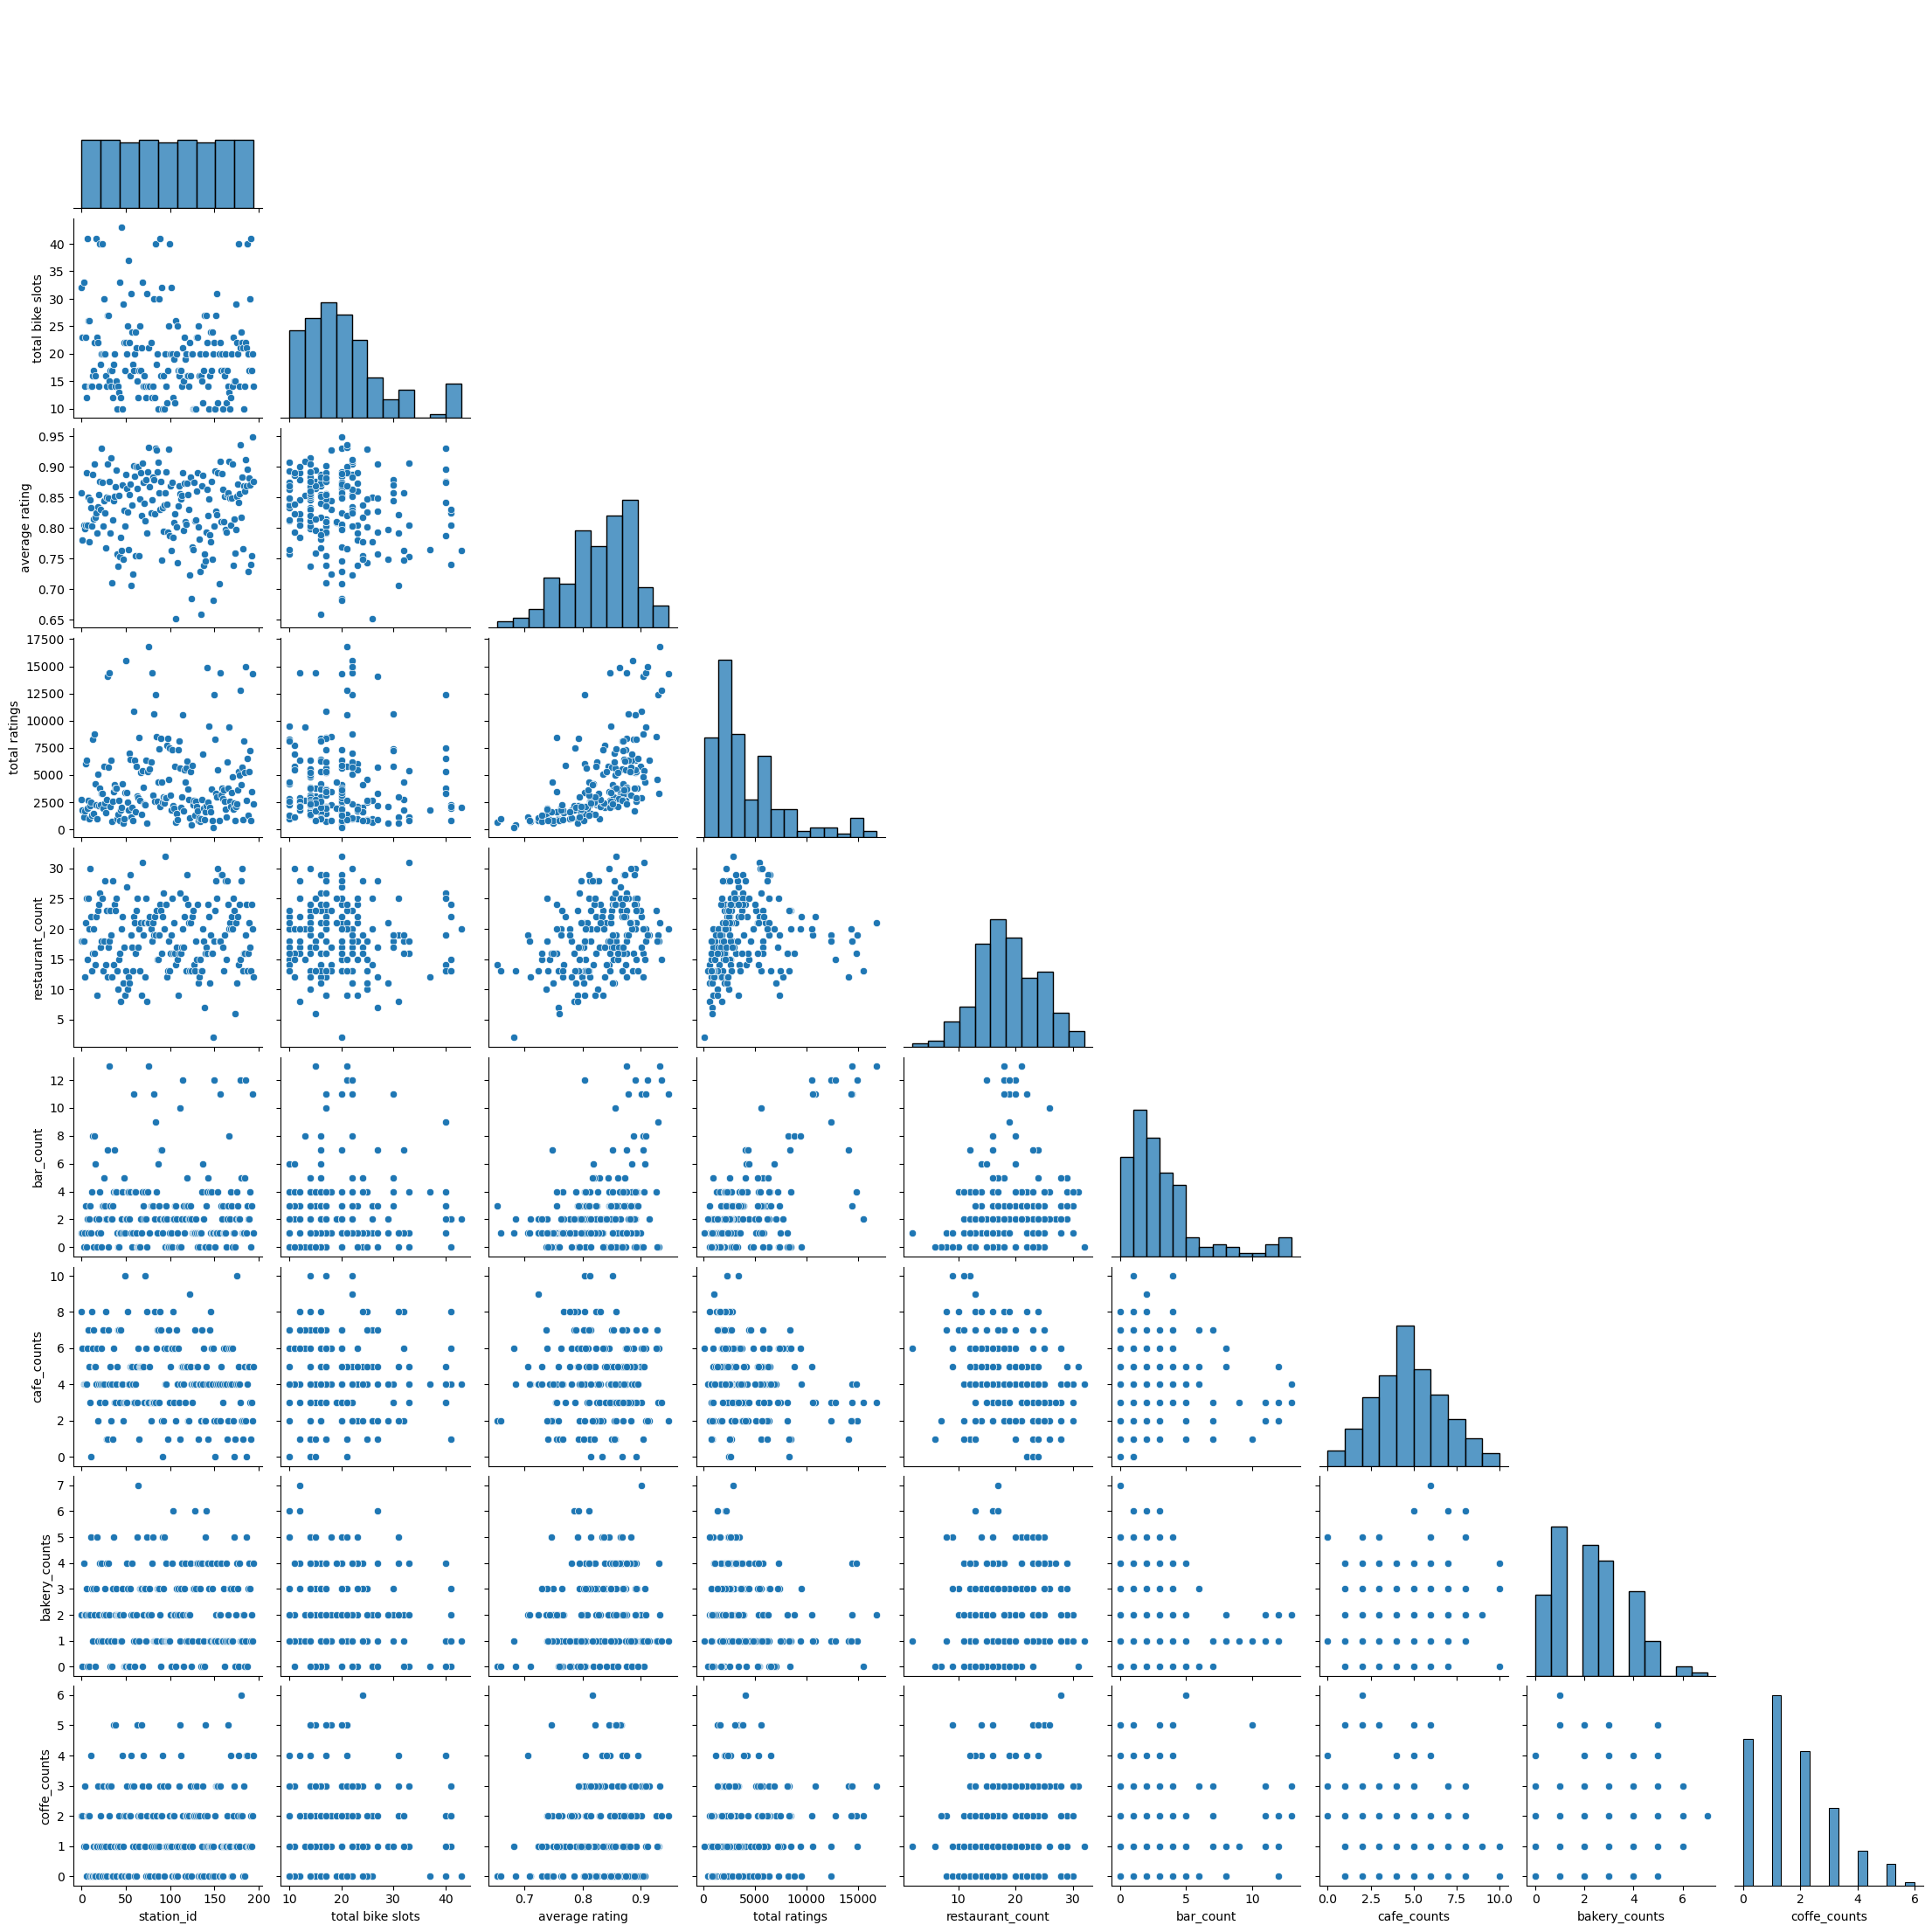

In [ ]:
# CityBike Data relationships with FOURSQUARE Points_Of_Interest In Lisbon City, Portugal

# Seaborn's Pairplot
sns.pairplot(EDA_bikestations,corner=True)
plt.show()

### Relationships

- CityBike Data
    - Observing trends with **Total Bikes Slots** for each Bike Station to retain a constant variable
        - Other variables, such as Free Slots, Empty Slots, fluctuate in accordance with TimeStamp.


#### Total Bike Slot Relationships

- No strong relationships identified from visualisation Pairplot


--------------------------------------------------------

### Alternative Relationship

#### Free Bikes & Categories

- Timestamp of acquired CityBike API Data is **12:39 AM Sunday, July 27 2025.**
    - Hypothesis Testing for **Free Bikes against category values counts of restaurants and bars & Average Rating**

In [ ]:
# Organised by same index and station_id.
# Join 'free bikes' value to EDA dataframe
EDA_bikestations['free bikes'] = lb_citybikes['free bikes']

EDA_bikestations

,station_id,total bike slots,average rating,total ratings,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts,free bikes
0,0,32,0.857668,2772.0,18,1,8,2,2,0
1,1,23,0.780331,1808.0,18,1,6,0,2,0
2,2,33,0.804175,1134.0,18,0,4,4,1,7
3,3,14,0.798679,1669.0,12,1,4,2,3,8
4,4,23,0.803990,6061.0,21,3,4,2,1,6
...,...,...,...,...,...,...,...,...,...,...
190,190,30,0.869974,7211.0,17,4,3,3,1,12
191,191,41,0.739951,774.0,13,0,1,1,2,1
192,192,17,0.754461,3428.0,24,3,3,2,1,0
193,193,20,0.948785,14309.0,20,11,2,1,2,16


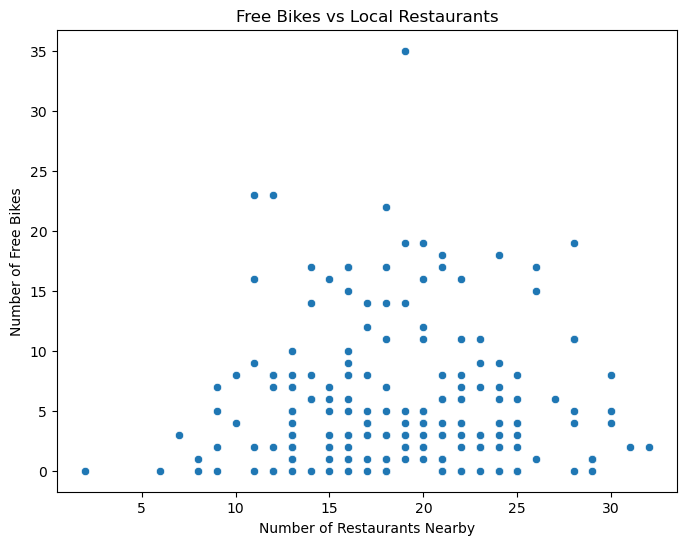

In [88]:
figure = plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=EDA_bikestations,
    x='restaurant_count',
    y='free bikes'
)
plt.title('Free Bikes vs Local Restaurants')
plt.xlabel("Number of Restaurants Nearby")
plt.ylabel("Number of Free Bikes")
plt.show()
freebikes_restaurant_fig = figure

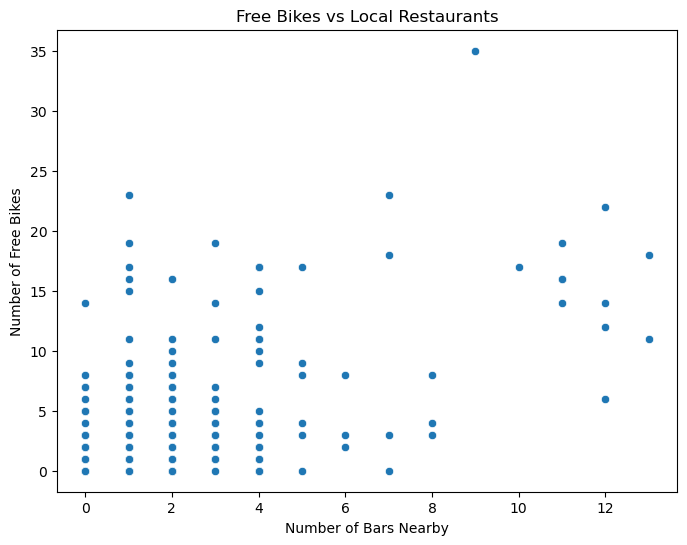

In [ ]:
figure = plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=EDA_bikestations,
    x='bar_count',
    y='free bikes'
)
plt.title('Free Bikes vs Local Restaurants')
plt.xlabel("Number of Bars Nearby")
plt.ylabel("Number of Free Bikes")
plt.show()
freebikes_bar_fig = figure

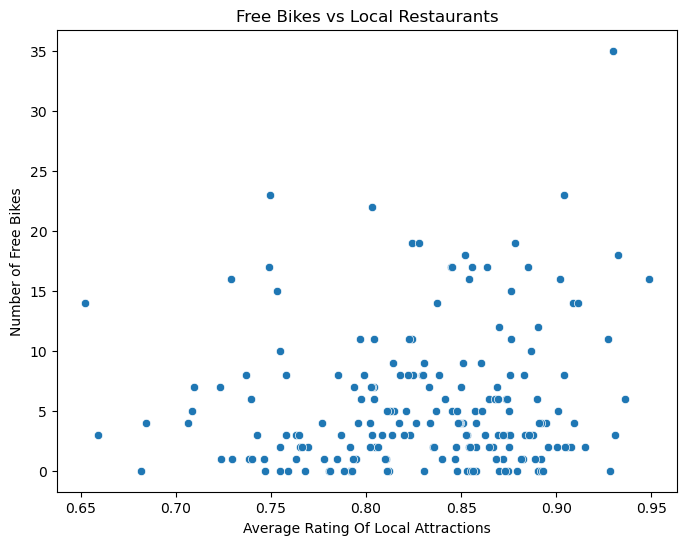

In [91]:
figure = plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=EDA_bikestations,
    x='average rating',
    y='free bikes'
)
plt.title('Free Bikes vs Local Restaurants')
plt.xlabel("Average Rating Of Local Attractions")
plt.ylabel("Number of Free Bikes")
plt.show()
freebikes_rating_fig = figure

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [92]:
import sqlite3

### Tables to create

- bike stations
- bike availability
- 

# 

In [99]:
# Create SQL Database
connection = sqlite3.connect('/Users/mitchellpalmer/Projects/Lighthouse Lab Projects/Data_Statistical_Modeling/Statistical_Modeling_Project/Statistical-Modelling-Project./data/citybikes_lisbon.db')
cursor = connection.cursor()

In [ ]:
# Create Dataframe Copy 
lb_citybikes_stations = lb_citybikes.copy()

# Produce bike_stations Dataframe
lb_citybikes_stations.drop(columns=['free bikes','empty slots','total slots','timestamp'], inplace=True)
lb_citybikes_stations

,latitude,longitude,station_id
0,38.753590,-9.157170,0
1,38.752310,-9.158850,1
2,38.770657,-9.160248,2
3,38.780690,-9.096220,3
4,38.702936,-9.175234,4
...,...,...,...
190,38.729724,-9.157531,190
191,38.711498,-9.194361,191
192,38.739395,-9.162447,192
193,38.708780,-9.137125,193


In [ ]:
# Create bike_stations SQL Table
lb_citybikes_stations.to_sql('bike_stations', con=connection, if_exists='append', index=False)

195

In [130]:
# Create Dataframe Copy 
lb_citybikes_availability = lb_citybikes.copy()

# Produce bike_availability Dataframe
lb_citybikes_availability.drop(columns=['latitude','longitude'], inplace=True)
lb_citybikes_availability

,timestamp,free bikes,empty slots,total slots,station_id
0,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0
1,2025-07-26T23:39:44.571444+00:00Z,0,23,23,1
2,2025-07-26T23:39:44.570809+00:00Z,7,26,33,2
3,2025-07-26T23:39:44.570706+00:00Z,8,6,14,3
4,2025-07-26T23:39:44.571010+00:00Z,6,17,23,4
...,...,...,...,...,...
190,2025-07-26T23:39:44.571251+00:00Z,12,18,30,190
191,2025-07-26T23:39:44.570595+00:00Z,1,40,41,191
192,2025-07-26T23:39:44.571255+00:00Z,0,17,17,192
193,2025-07-26T23:39:44.571246+00:00Z,16,4,20,193


In [131]:
# Create bike_availability SQL Table
lb_citybikes_stations.to_sql('bike_availability', con=connection, if_exists='append', index=False)

195

In [135]:
# Create Primary Key for Point_Of_Interest via Index
station_POI['interest_id'] = station_POI.index
station_POI

,name,rating,total num ratings,popularity,distance,veracity,category,station_id,interest_id
0,Torre Do Tombo,0.944024,21,0.944024,124,4,"Government Building, Library",0,0
1,Aula Magna,0.987013,127,0.987013,138,4,Concert Hall,0,1
2,Alameda da Universidade,0.938399,47,0.938399,121,4,"Plaza, Garden",0,2
3,Letras Bar,0.781422,11,0.781422,87,3,Portuguese Restaurant,0,3
4,Horto do Campo Grande,0.959710,40,0.959710,337,5,Flower Store,0,4
...,...,...,...,...,...,...,...,...,...
9657,Pastelaria Florida,0.952559,12,0.952559,257,4,Coffee Shop,194,9657
9658,Continente Bom Dia Acqua Roma,0.892909,17,0.892909,506,5,"Supermarket, Bakery",194,9658
9659,Café Império,0.971496,255,0.971496,502,5,Portuguese Restaurant,194,9659
9660,Quiosque da Alameda,0.969178,26,0.969178,404,5,"Café, Cafeteria",194,9660


In [142]:
# 700 unique category values
station_POI['category'].value_counts().sort_values().head(50)

category
Comfort Food Restaurant, Portuguese Restaurant             1
Sausage Store, Spanish Restaurant                          1
Juice Bar, Coffee Shop                                     1
Steakhouse, Portuguese Restaurant                          1
Sandwich Spot, Italian Restaurant                          1
Deli, Coffee Shop, Bakery                                  1
Portuguese Restaurant, Fried Chicken Joint, BBQ Joint      1
Burger Joint, BBQ Joint, Steakhouse                        1
Comedy Club                                                1
Art Gallery, Science Museum                                1
Grocery Store, Café, Portuguese Restaurant                 1
African Restaurant, BBQ Joint                              1
Night Club, Lounge, Sushi Restaurant                       1
Culinary School                                            1
Tapas Restaurant, Spanish Restaurant                       1
Soccer Field, Basketball Court                             1
Vegan and Veget

In [124]:
test = pd.read_sql(''' 
SELECT * FROM bike_stations''',connection)

test

DatabaseError: Execution failed on sql ' 
SELECT * FROM bike_stations': no such table: bike_stations

In [123]:
cursor.execute(''' 
DROP TABLE bike_stations''')

Look at the data before and after the join to validate your data.